Task - 4  Separation Data Cleaning & Analysis

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Part 1 – Basic Data Understanding (Pandas)

In [88]:
df = pd.read_csv('separated_names.csv')

df.head(10)

,id,ID,First_Name
0,12345Johnny,12345,Johnny
1,93829Sally,93829,Sally
2,20391Larry,20391,Larry
3,29324Valerie,29324,Valerie
4,43557Nina,43557,Nina
5,55027Bob,55027,Bob
6,78551Julia,78551,Julia
7,77268Nina,77268,Nina
8,19876Xander,19876,Xander
9,28290Fiona,28290,Fiona


In [89]:
df.shape

(100, 3)

In [90]:
df.columns

Index(['id', 'ID', 'First_Name'], dtype='object')

In [91]:
df.dtypes

id            object
ID             int64
First_Name    object
dtype: object

In [92]:
df.isnull().sum()

id            0
ID            0
First_Name    0
dtype: int64

In [93]:
df.duplicated().sum()

np.int64(0)

In [94]:
df['ID'].describe()

count      100.000000
mean     50694.190000
std      26500.870402
min      11314.000000
25%      26643.500000
50%      44728.000000
75%      74815.000000
max      95807.000000
Name: ID, dtype: float64

In [95]:
df['First_Name'].describe()

count        100
unique        28
top       Sophia
freq           8
Name: First_Name, dtype: object

Part 2 – Data Cleaning

In [96]:
df['ID'] = df['id'].str[:5].astype(int)
df['First_Name'] = df['id'].str[5:]

df['First_Name'] = df['First_Name'].str.strip().str.title()

print(df['ID'].is_unique)

True


Part 3 – Exploratory Data Analysis (EDA)

0    Sophia
Name: First_Name, dtype: object
28
31    95807
98    94063
1     93829
32    92910
84    92725
Name: ID, dtype: int64
11    11314
0     12345
97    12962
52    13595
27    14287
Name: ID, dtype: int64


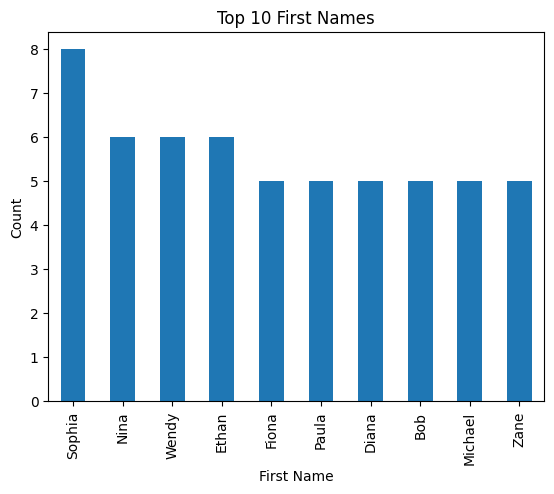

In [97]:
print(df['First_Name'].mode())

print(df['First_Name'].nunique())

print(df['ID'].nlargest(5))

print(df['ID'].nsmallest(5))

df['First_Name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 10 First Names')
plt.show()

Part 4 – Statistics

In [98]:
print("Mean : ",df['ID'].mean())

print("Median : ",df['ID'].median())

print("Variance : ",df['ID'].var())

print("Standard Deviation : ",df['ID'].std())

print("P(ID > 50000): ", (df['ID'] > 50000).mean())

print("P(Name starts with A): ", df['First_Name'].str.startswith("A").mean())

print("percentage of Names > 5 letters: ", (df['First_Name'].str.len() > 5).mean() * 100)

Mean :  50694.19
Median :  44728.0
Variance :  702296132.0746465
Standard Deviation :  26500.870402208424
P(ID > 50000):  0.45
P(Name starts with A):  0.04
percentage of Names > 5 letters:  33.0


Part 5 – Linear Algebra & NumPy

In [99]:
ID_array = df['ID'].to_numpy()

score_array = np.random.randint(1, 100, size=len(df))

print("Addition:", ID_array + score_array)
print("Subtraction:", ID_array - score_array)

print("Dot Product:", np.dot(ID_array, score_array))

features = np.column_stack((ID_array, score_array))
weights = np.array([0.3, 0.7])
result = features @ weights
print("Matrix Multiplication Result:", result)

Addition: [12427 93869 20488 29338 43616 55079 78560 77340 19898 28300 38977 11396
 90422 79624 25799 31832 34171 47749 31480 27564 15381 87391 87508 18402
 19073 20320 82771 14317 92070 70811 17560 95898 92923 36399 15162 58173
 72537 61864 45623 42192 81638 26656 53364 73730 66449 90101 46884 90404
 62402 75001 24480 40025 13679 66344 36528 81749 46491 22491 81781 82153
 22231 63402 60441 60670 32870 26730 65301 36905 43042 32566 25260 65288
 88578 89484 17563 41422 27513 17408 25038 39297 40233 22367 71144 58299
 92790 16152 36904 87927 74860 85459 43973 89702 49958 42893 68609 58423
 43046 13058 94154 17143]
Subtraction: [12263 93789 20294 29310 43498 54975 78542 77196 19854 28280 38805 11232
 90290 79520 25629 31796 34097 47559 31408 27488 15197 87243 87442 18258
 18921 20162 82573 14257 92012 70631 17508 95716 92897 36313 15090 57991
 72361 61696 45443 42078 81448 26634 53214 73574 66279 90095 46756 90342
 62326 74821 24380 39887 13511 66284 36520 81575 46325 22451 81779 82105
 2

Part 6 – Feature Engineering

In [100]:
df['Name_Length'] = df['First_Name'].str.len()
print(df['Name_Length'])

df['Starts_With_Vowel'] = df['First_Name'].fillna('').str[0].str.upper().isin(['A','E','I','O','U']).astype(int)
print(df['Starts_With_Vowel'])

df['High_ID'] = (df['ID'] > 50000).astype(int)
print(df['High_ID'])

df['Length_Quartile'] = pd.qcut(df['Name_Length'], 4, labels=False, duplicates='drop')
print(df['Length_Quartile'])

0     6
1     5
2     5
3     7
4     4
     ..
95    3
96    5
97    5
98    3
99    7
Name: Name_Length, Length: 100, dtype: int64
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    0
98    1
99    0
Name: Starts_With_Vowel, Length: 100, dtype: int64
0     0
1     1
2     0
3     0
4     0
     ..
95    1
96    0
97    0
98    1
99    0
Name: High_ID, Length: 100, dtype: int64
0     1
1     0
2     0
3     2
4     0
     ..
95    0
96    0
97    0
98    0
99    2
Name: Length_Quartile, Length: 100, dtype: int64


Part 7 – SQL Simulation in Pandas

In [101]:
vowel_highID = df[(df['Starts_With_Vowel'] == 1) & (df['High_ID'] == 1)]
print(vowel_highID)

top_10_IDs = df.sort_values('ID', ascending=False).head(10)
print(top_10_IDs[['ID', 'First_Name']])

group_count = df.groupby('Starts_With_Vowel').size()
print(group_count)

sorted_df = df.sort_values(['Name_Length', 'ID'], ascending=[False, True])
print(sorted_df[['ID','First_Name','Name_Length']])

            id     ID First_Name  Name_Length  Starts_With_Vowel  High_ID  \
35    58082Uma  58082        Uma            3                  1        1   
37  61780Ethan  61780      Ethan            5                  1        1   
72  88577Ethan  88577      Ethan            5                  1        1   
73  89466Ethan  89466      Ethan            5                  1        1   
95    58388Ian  58388        Ian            3                  1        1   
98    94063Uma  94063        Uma            3                  1        1   

    Length_Quartile  
35                0  
37                0  
72                0  
73                0  
95                0  
98                0  
       ID First_Name
31  95807     Xander
98  94063        Uma
1   93829      Sally
32  92910     Sophia
84  92725       Nina
28  92041     Sophia
47  90373    Michael
12  90356      Paula
45  90098     Hannah
91  89694      Fiona
Starts_With_Vowel
0    83
1    17
dtype: int64
       ID First_Name  Name_L

Part 8 – Insights

In [102]:
print("Most Frequent Name:", df['First_Name'].mode()[0])

print("Average ID:", df['ID'].mean())

corr = df['ID'].corr(df['Name_Length'])
print("Correlation (ID vs Name_Length):", corr)
if corr > 0.3:
    print("Trend: Positive → Larger IDs tend to have longer names")
elif corr < -0.3:
    print("Trend: Negative → Larger IDs tend to have shorter names")
else:
    print("Trend: No clear relationship between ID size and name length")

print("Quartile with longest average IDs:", df.groupby('Length_Quartile')['ID'].mean().idxmax())

Most Frequent Name: Sophia
Average ID: 50694.19
Correlation (ID vs Name_Length): -0.02587516459648293
Trend: No clear relationship between ID size and name length
Quartile with longest average IDs: 1
